# Answer Type

In [1]:
import sys
sys.path.append("../torch_based")

import json
import torch

from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from utils import plot_confusion_matrix

In [2]:
with open("../output/predictions_ccj.json", "r") as f:
    predictions = json.load(f)

In [3]:
_, examples = torch.load("../input/tensorflow2-question-answering/cached_dev_pytorch_model.bin_512")

In [4]:
idx2label = ["unknown", "yes", "no", "short", "long"]

In [5]:
id2label = {}
for e in tqdm(examples, desc="Creating examples dict"):
    id2label[e.example_id] = int(e.answer.type)

Creating examples dict: 100%|██████████| 1600/1600 [00:00<00:00, 569056.76it/s]


In [6]:
y_true_list, y_pred_list = [], []
for pred in tqdm(predictions['predictions'], desc="Creating y_true and y_pred"):
    y_pred_list.append(pred['answer_type'])
    
    y_true = id2label[pred["example_id"]]
    y_true_list.append(y_true)


Creating y_true and y_pred: 100%|██████████| 1600/1600 [00:00<00:00, 484435.60it/s]


## Visualize result

Confusion matrix, without normalization


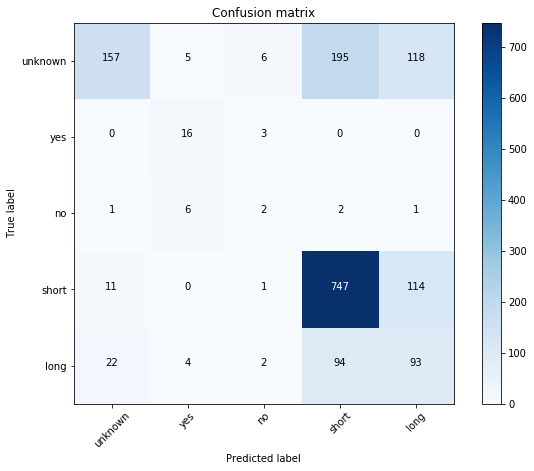

In [8]:
cm = confusion_matrix(y_true_list,y_pred_list)
plot_confusion_matrix(cm, classes=idx2label, normalize=False)

In [9]:
print(classification_report(y_true_list, y_pred_list, target_names=idx2label))

              precision    recall  f1-score   support

     unknown       0.82      0.33      0.47       481
         yes       0.52      0.84      0.64        19
          no       0.14      0.17      0.15        12
       short       0.72      0.86      0.78       873
        long       0.29      0.43      0.34       215

    accuracy                           0.63      1600
   macro avg       0.50      0.52      0.48      1600
weighted avg       0.69      0.63      0.62      1600

